<a href="https://colab.research.google.com/github/Jefferson-marques/Malaria_ML/blob/master/Machine_Learning_Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# IMPORTANDO BIBLIOTECAS
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# Importando bibliotecas e o dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import os
print(os.listdir("drive/My Drive/cell_images"))

['Parasitized', 'Uninfected']


In [0]:
# Especificando o dataset
img_dir='drive/My Drive/cell_images'

In [0]:
path=Path(img_dir)
path

PosixPath('drive/My Drive/cell_images')

In [0]:
data = ImageDataBunch.from_folder(path, train=".",
                                 valid_pct=0.2,
                                 ds_tfms=get_transforms(flip_vert=True, max_warp=0),
                                 size=224,bs=5,num_workers=6).normalize(imagenet_stats) 

In [0]:
print(f'Classes: \n{data.classes}')

Classes: 
['Parasitized', 'Uninfected']


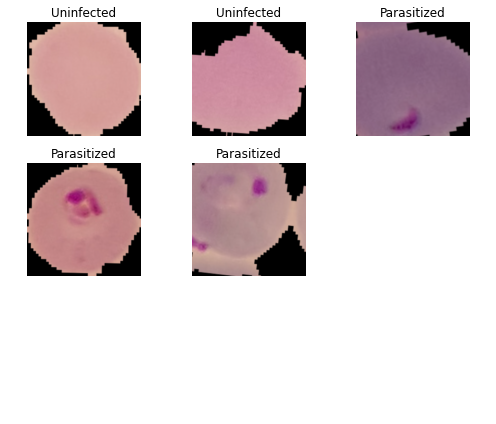

In [0]:
#Identificação do dataset
data.show_batch(rows=5, figsize=(7,6))

In [0]:
# Pegando modelo
learn = cnn_learner(data, models.resnet34, metrics=accuracy, model_dir="/tmp/model")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


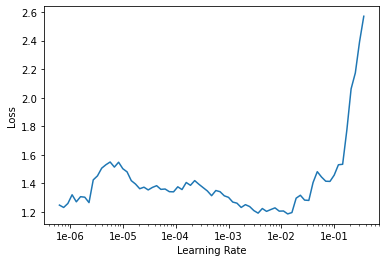

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.379715,0.220831,0.920972,41:32
1,0.349601,0.216811,0.928222,04:21
2,0.383535,0.270384,0.939279,04:19
3,0.437719,0.283318,0.934747,04:21
4,0.227115,0.207991,0.943266,04:18
5,0.245358,0.185925,0.944535,04:20
6,0.267500,0.196359,0.953054,04:21
7,0.291057,0.148154,0.953417,04:25


In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


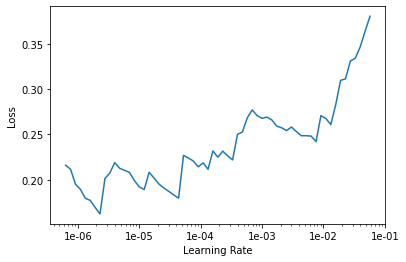

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8, max_lr=slice(5e-6,5e-5 ))

epoch,train_loss,valid_loss,accuracy,time
0,0.282273,0.150465,0.955048,05:20
1,0.233143,0.162710,0.951423,05:20
2,0.270599,0.226167,0.951967,05:19
3,0.255966,0.276675,0.949792,05:20
4,0.215634,0.189275,0.951423,05:21
5,0.235283,0.173378,0.955954,05:22
6,0.238573,0.176581,0.955954,05:20
7,0.218599,0.179064,0.954142,05:20


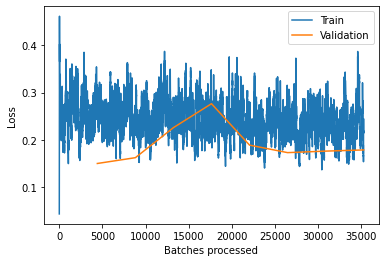

In [0]:
learn.recorder.plot_losses()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

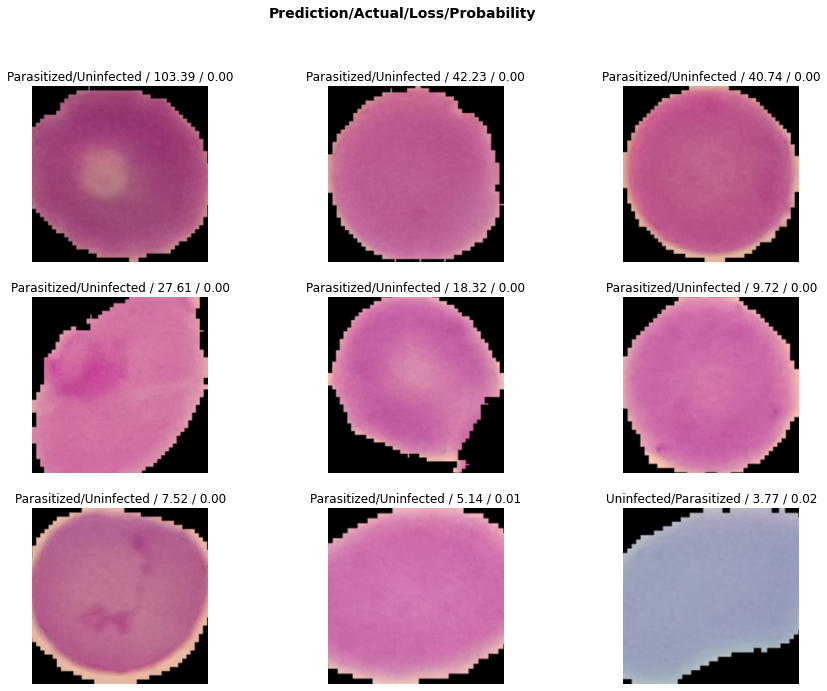

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

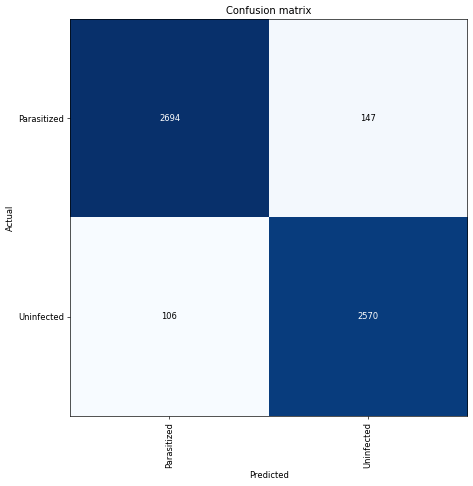

In [0]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)
